In [4]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows -p ./data --force
!unzip -o ./data/*.zip -d ./data
!ls ./data

Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
License(s): CC0-1.0
  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 256MB/s]
Archive:  ./data/imdb-dataset-of-top-1000-movies-and-tv-shows.zip
  inflating: ./data/imdb_top_1000.csv  
imdb-dataset-of-top-1000-movies-and-tv-shows.zip  imdb_top_1000.csv


In [5]:
import pandas as pd

df = pd.read_csv("./data/imdb_top_1000.csv")

print("shape:", df.shape)
print("columns:")
print(df.columns)

df.head(3)


shape: (1000, 16)
columns:
Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [7]:
USE_SUB = True
N = 400

df2 = df.copy()

if USE_SUB and len(df2) > N:
    df2 = df2.sample(N, random_state=1)

baskets = []

for i in range(len(df2)):
    row = df2.iloc[i]
    stars = []

    for c in ["Star1","Star2","Star3","Star4"]:
        val = row[c]

        if pd.isna(val):
            continue

        val = str(val).strip()

        if val == "" or val.lower() == "nan":
            continue

        stars.append(val)

    stars = list(set(stars))

    if len(stars) > 0:
        baskets.append(stars)

print("number of baskets:", len(baskets))
print("example basket:", baskets[0])

number of baskets: 400
example basket: ['Maggie Cheung', 'Tony Chiu-Wai Leung', 'Jet Li', 'Ziyi Zhang']


In [8]:
vertical = {}

for tid in range(len(baskets)):
    basket = baskets[tid]

    for item in basket:
        if item not in vertical:
            vertical[item] = set()

        vertical[item].add(tid)

print("unique actors:", len(vertical))

some_actor = list(vertical.keys())[0]
print(some_actor, "-> support:", len(vertical[some_actor]))

unique actors: 1292
Maggie Cheung -> support: 1


In [9]:
minsup_ratio = 0.05
minsup = int(minsup_ratio * len(baskets))

print("min support absolute:", minsup)

freq1 = {}

for actor in vertical:
    supp = len(vertical[actor])
    if supp >= minsup:
        freq1[actor] = supp

print("number of frequent 1-itemsets:", len(freq1))

for i, (actor, supp) in enumerate(freq1.items()):
    print(actor, supp)
    if i > 10:
        break

min support absolute: 20
number of frequent 1-itemsets: 0


In [10]:
minsup = 5

freq1 = {}
for actor in vertical:
    s = len(vertical[actor])
    if s >= minsup:
        freq1[actor] = s

print("minsup:", minsup)
print("freq singles:", len(freq1))

top = sorted(freq1.items(), key=lambda x: x[1], reverse=True)[:15]
top

minsup: 5
freq singles: 6


[('Tom Hanks', 6),
 ('Al Pacino', 6),
 ('Christian Bale', 5),
 ('Tom Cruise', 5),
 ('Humphrey Bogart', 5),
 ('Robert De Niro', 5)]

In [11]:
freq_actors = list(freq1.keys())
pairs = {}

for i in range(len(freq_actors)):
    a1 = freq_actors[i]
    for j in range(i+1, len(freq_actors)):
        a2 = freq_actors[j]


        inter = vertical[a1] & vertical[a2]
        supp = len(inter)

        if supp >= minsup:
            pairs[(a1,a2)] = supp

print("number of frequent pairs:", len(pairs))
pairs

number of frequent pairs: 0


{}

In [12]:
minsup1 = 5
minsup2 = 2


freq1 = {}
for actor in vertical:
    s = len(vertical[actor])
    if s >= minsup1:
        freq1[actor] = s

freq_actors = list(freq1.keys())

pairs = {}
for i in range(len(freq_actors)):
    a1 = freq_actors[i]
    for j in range(i+1, len(freq_actors)):
        a2 = freq_actors[j]
        supp = len(vertical[a1] & vertical[a2])
        if supp >= minsup2:
            pairs[(a1,a2)] = supp

print("freq singles:", len(freq1))
print("freq pairs:", len(pairs))


sorted(pairs.items(), key=lambda x: x[1], reverse=True)

freq singles: 6
freq pairs: 1


[(('Al Pacino', 'Robert De Niro'), 2)]

In [15]:
from itertools import combinations
minsup3 = 2
triples = {}
for a,b,c in combinations(freq_actors, 3):
    supp = len(vertical[a] & vertical[b] & vertical[c])
    if supp >= minsup3:
        triples[(a,b,c)] = supp

print("freq triples:", len(triples))
sorted(triples.items(), key=lambda x: x[1], reverse=True)[:10]

freq triples: 0


[]

In [16]:
import time

def quick_run(N, minsup1=3, minsup2=2):
    df_tmp = df.sample(N, random_state=1) if N < len(df) else df.copy()

    baskets_tmp = []
    for i in range(len(df_tmp)):
        row = df_tmp.iloc[i]
        b = []
        for c in ["Star1","Star2","Star3","Star4"]:
            x = row[c]
            if pd.isna(x):
                continue
            x = str(x).strip()
            if x == "" or x.lower() == "nan":
                continue
            b.append(x)
        b = list(set(b))
        if b:
            baskets_tmp.append(b)

    vertical_tmp = {}
    for tid in range(len(baskets_tmp)):
        for item in baskets_tmp[tid]:
            if item not in vertical_tmp:
                vertical_tmp[item] = set()
            vertical_tmp[item].add(tid)

    t0 = time.time()

    freq1_tmp = {}
    for actor in vertical_tmp:
        s = len(vertical_tmp[actor])
        if s >= minsup1:
            freq1_tmp[actor] = s

    actors_tmp = list(freq1_tmp.keys())

    pairs_tmp = 0
    for i in range(len(actors_tmp)):
        for j in range(i+1, len(actors_tmp)):
            a1 = actors_tmp[i]
            a2 = actors_tmp[j]
            if len(vertical_tmp[a1] & vertical_tmp[a2]) >= minsup2:
                pairs_tmp += 1

    t1 = time.time()

    return {
        "N": N,
        "unique_actors": len(vertical_tmp),
        "freq1": len(freq1_tmp),
        "freq2_pairs": pairs_tmp,
        "sec": round(t1 - t0, 4)
    }

for N in [200, 400, 800, 1000]:
    print(quick_run(N))

{'N': 200, 'unique_actors': 703, 'freq1': 16, 'freq2_pairs': 2, 'sec': 0.0001}
{'N': 400, 'unique_actors': 1292, 'freq1': 72, 'freq2_pairs': 12, 'sec': 0.0008}
{'N': 800, 'unique_actors': 2268, 'freq1': 204, 'freq2_pairs': 42, 'sec': 0.0059}
{'N': 1000, 'unique_actors': 2709, 'freq1': 271, 'freq2_pairs': 63, 'sec': 0.0113}


In [17]:
results = []

for N in [200, 400, 800, 1000]:
    results.append(quick_run(N))

res_df = pd.DataFrame(results)
res_df

,N,unique_actors,freq1,freq2_pairs,sec
0,200,703,16,2,0.0001
1,400,1292,72,12,0.0008
2,800,2268,204,42,0.0059
3,1000,2709,271,63,0.0103


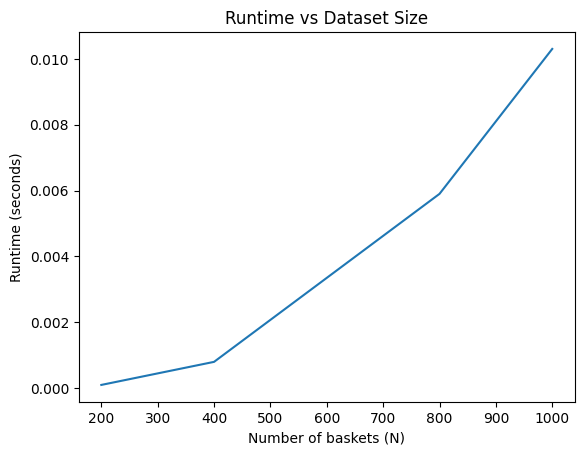

In [18]:
import matplotlib.pyplot as plt

plt.plot(res_df["N"], res_df["sec"])
plt.xlabel("Number of baskets (N)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime vs Dataset Size")
plt.show()